In [2]:
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-5-9b1adca762de>, line 1)


# Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using `grid_search`.




In [2]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

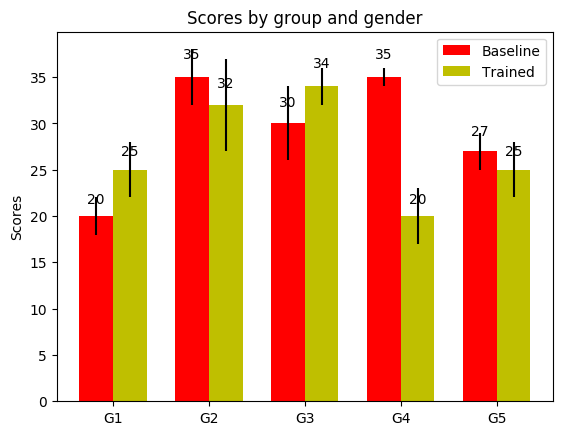

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Baseline', 'Trained'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

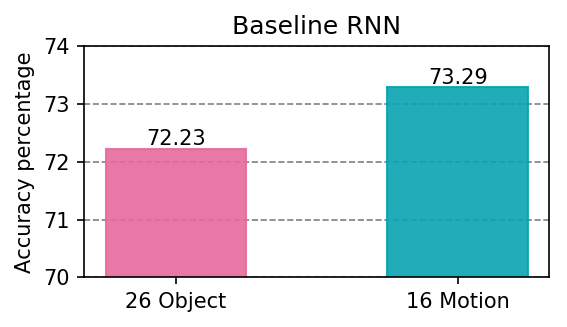

In [77]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('26 Object','16 Motion')
y_values = [72.23, 73.29]

x_ticks = np.arange(len(x_labels))

plt.figure(figsize=(4,2), dpi=150)

w=0.5
barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=w)


#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    


import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af']

for i in range(len(barlist)): barlist[i].set_color(colors[i])




plt.xticks(x_ticks, x_labels)
plt.ylabel('Accuracy percentage')
plt.title('Baseline RNN')
plt.ylim(70,74)

ax = plt.gca()
ax.set_axisbelow(True)
#ax.tick_params(axis='x', which='major', labelsize=12)
#ax.tick_params(axis='y', which='major', labelsize=12)
ax.yaxis.grid(linestyle='dashed', color='gray')
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()

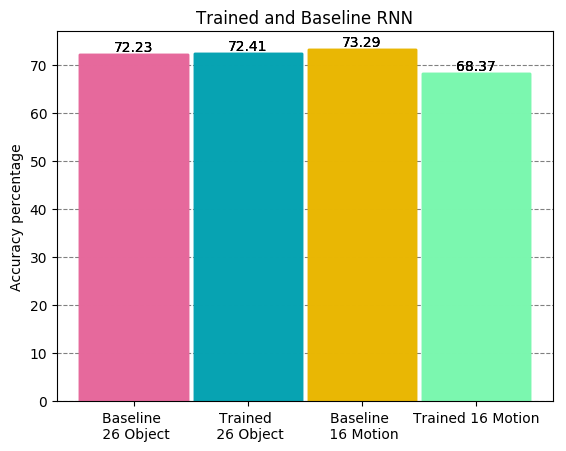

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('Baseline \n 26 Object','Trained \n 26 Object', 'Baseline \n 16 Motion', 'Trained 16 Motion')
y_values = [72.23, 72.41,73.29,68.37]

x_ticks = np.arange(len(x_labels))

barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=0.95)

#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')


import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af']
for i in range(len(barlist)): barlist[i].set_color(colors[i])

plt.xticks(x_ticks, x_labels)
plt.ylabel('Accuracy percentage')
#plt.xlabel('X label')
plt.title('Trained and Baseline RNN')

ax = plt.gca()
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed', color='gray')
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()


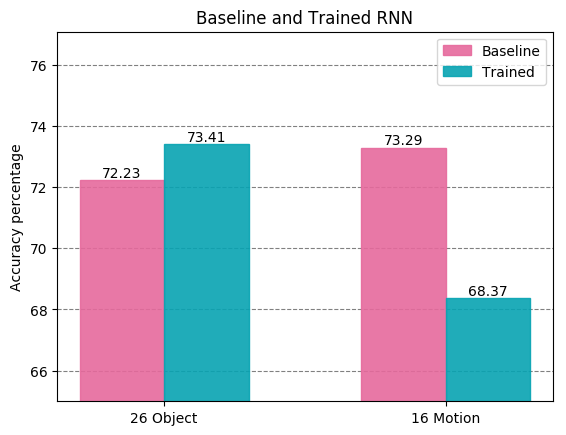

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('26 Object','16 Motion')
y_values = [72.23, 73.29]
y_values2 = [73.41,68.37]

x_ticks = np.arange(len(x_labels))


w=0.3
barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=w)
barlist2 = plt.bar(x_ticks+w, y_values2, align='center', alpha=0.9, width=w)

#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    
for rect in barlist2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')

    

import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af']

for i in range(len(barlist)): barlist[i].set_color(colors[0])
for i in range(len(barlist2)): barlist2[i].set_color(colors[1]); 


plt.xticks(x_ticks+w/2, x_labels)
plt.ylabel('Accuracy percentage')
plt.title('Baseline and Trained RNN')
plt.ylim(65)

ax = plt.gca()
ax.legend((barlist[0], barlist2[0]), ('Baseline', 'Trained'))
ax.set_axisbelow(True)
#ax.tick_params(axis='x', which='major', labelsize=12)
#ax.tick_params(axis='y', which='major', labelsize=12)
ax.yaxis.grid(linestyle='dashed', color='gray')
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()


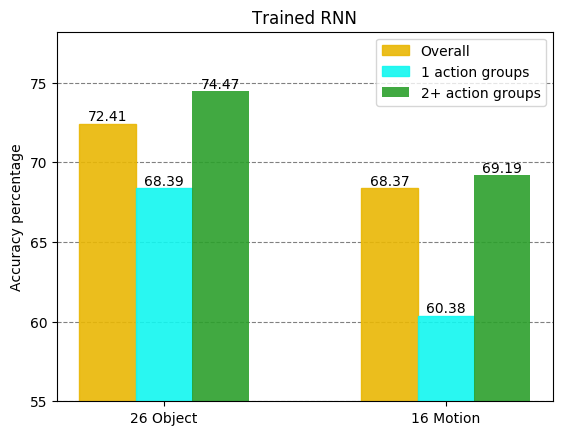

In [48]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('26 Object','16 Motion')
y_values = [72.41, 68.37]
y_values2 = [68.39,60.38]
y_values3 = [74.47,69.19]

x_ticks = np.arange(len(x_labels))


w=0.2
barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=w)
barlist2 = plt.bar(x_ticks+w, y_values2, align='center', alpha=0.9, width=w)
barlist3 = plt.bar(x_ticks+2*w, y_values3, align='center', alpha=0.9, width=w)

#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    
for rect in barlist2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    
for rect in barlist3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')

    

import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
#colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af'] #first two are for baseline and trainde
colors = ['#e9b704', '#7bf7af','#11f7f0']

for i in range(len(barlist)): barlist[i].set_color(colors[0])
for i in range(len(barlist2)): barlist2[i].set_color(colors[1]); 
for i in range(len(barlist2)): barlist2[i].set_color(colors[2]); 

plt.xticks(x_ticks+w, x_labels)
plt.ylabel('Accuracy percentage')
plt.title('Trained RNN')
plt.ylim(55)

ax = plt.gca()
ax.legend((barlist[0], barlist2[0], barlist3[0]), ('Overall', '1 action groups', '2+ action groups'), loc='upper right')
ax.set_axisbelow(True)
#ax.tick_params(axis='x', which='major', labelsize=12)
#ax.tick_params(axis='y', which='major', labelsize=12)
ax.yaxis.grid(linestyle='dashed', color='gray')
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()


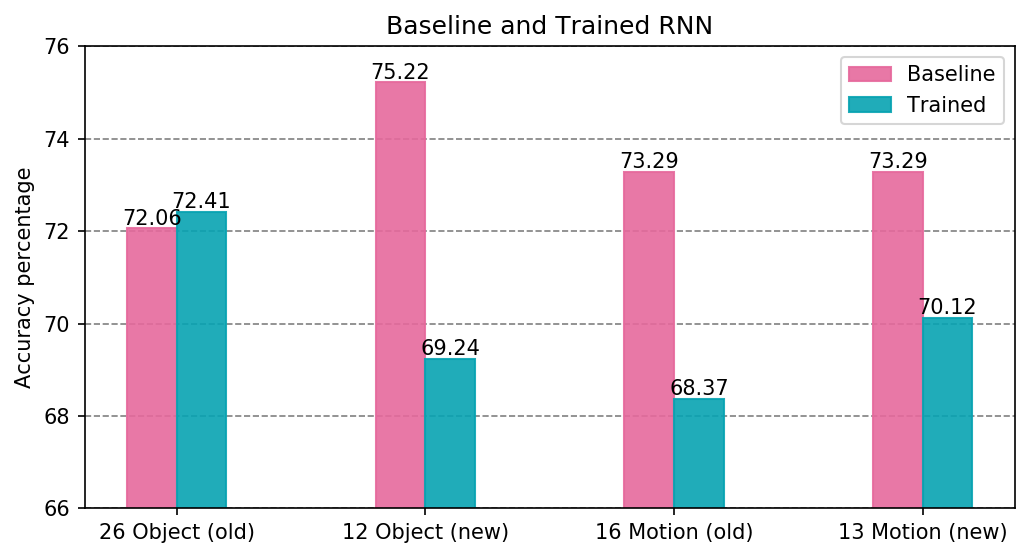

In [87]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('26 Object (old)', '12 Object (new)', '16 Motion (old)', '13 Motion (new)')
y_values = [72.06, 75.22, 73.29, 73.29] # all the baseline
y_values2 = [72.41, 69.24, 68.37, 70.12] #all the trained


x_ticks = np.arange(len(x_labels))

plt.figure(figsize=(8,4), dpi=150)


w=0.2
barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=w)
barlist2 = plt.bar(x_ticks+w, y_values2, align='center', alpha=0.9, width=w)

#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    
for rect in barlist2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')


    

import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
#colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af'] #first two are for baseline and trainde
colors = ['#e6699c', '#07a3b2']

for i in range(len(barlist)): barlist[i].set_color(colors[0])
for i in range(len(barlist2)): barlist2[i].set_color(colors[1]); 

plt.xticks(x_ticks+w/2, x_labels)
plt.ylabel('Accuracy percentage')
plt.title('Baseline and Trained RNN')
plt.ylim(66, 76)

ax = plt.gca()
ax.legend((barlist[0], barlist2[0]), ('Baseline', 'Trained'), loc='upper right')
ax.set_axisbelow(True)
#ax.tick_params(axis='x', which='major', labelsize=12)
#ax.tick_params(axis='y', which='major', labelsize=12)
ax.yaxis.grid(linestyle='dashed', color='gray')
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()


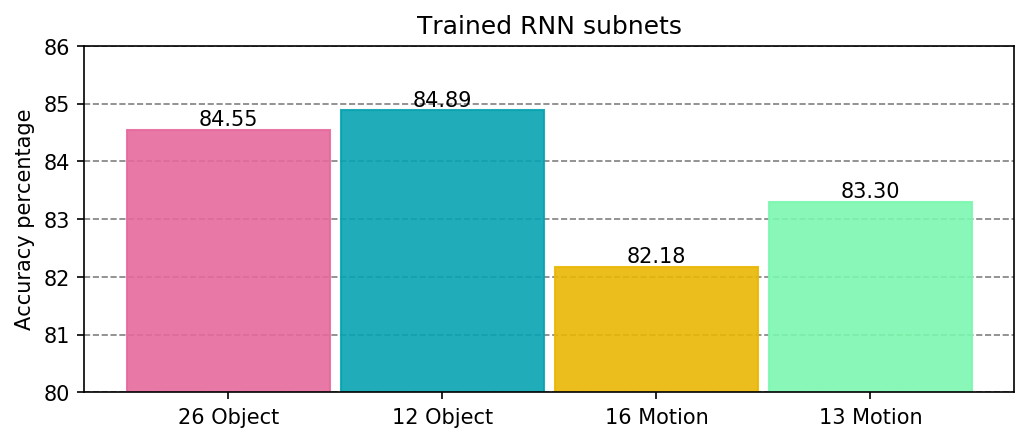

In [5]:
# 4 * 1 ideal subnet

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('26 Object','12 Object', '16 Motion', '13 Motion')
y_values = [84.55, 84.89, 82.18, 83.30]

x_ticks = np.arange(len(x_labels))

plt.figure(figsize=(8,3), dpi=150)

barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=0.95)

#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')


import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af']
for i in range(len(barlist)): barlist[i].set_color(colors[i])

plt.xticks(x_ticks, x_labels)
plt.ylabel('Accuracy percentage')
#plt.xlabel('X label')
plt.title('Trained RNN subnets')

ax = plt.gca()
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed', color='gray')
plt.ylim(80, 86)
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()


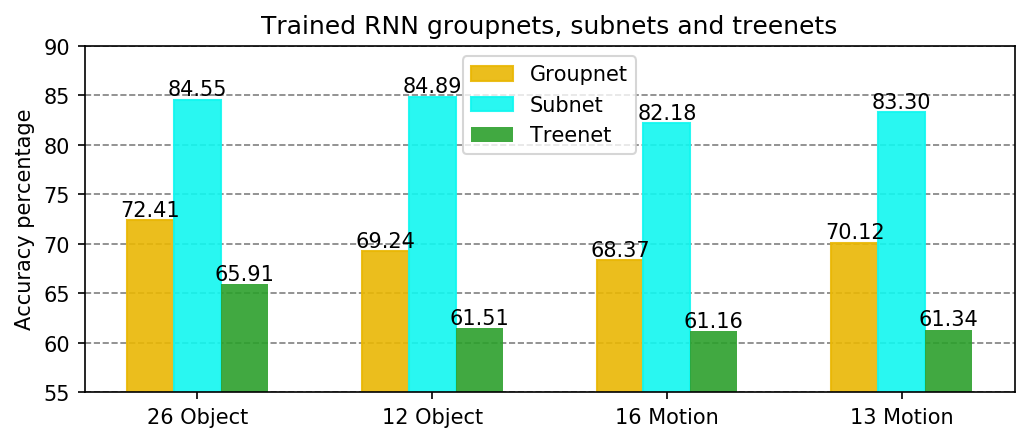

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_labels = ('26 Object','12 Object', '16 Motion', '13 Motion')
y_values = [72.41,69.24,68.37,70.12] #all the groups
y_values2 = [84.55, 84.89, 82.18, 83.30] #subnet
y_values3 = [65.91, 61.51, 61.16, 61.34] #final acc

x_ticks = np.arange(len(x_labels))

plt.figure(figsize=(8,3), dpi=150)
plt.ylim(70,90)

w=0.2
barlist = plt.bar(x_ticks, y_values, align='center', alpha=0.9, width=w)
barlist2 = plt.bar(x_ticks+w, y_values2, align='center', alpha=0.9, width=w)
barlist3 = plt.bar(x_ticks+2*w, y_values3, align='center', alpha=0.9, width=w)

#write results above bar
for rect in barlist:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    
for rect in barlist2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')
    
for rect in barlist3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom')

    

import randomcolor
#colors = randomcolor.RandomColor().generate(count=len(x_labels)) #as many group or actions  
#colors = ['#e6699c', '#07a3b2','#e9b704', '#7bf7af'] #first two are for baseline and trainde
colors = ['#e9b704', '#7bf7af','#11f7f0']

for i in range(len(barlist)): barlist[i].set_color(colors[0])
for i in range(len(barlist2)): barlist2[i].set_color(colors[1]); 
for i in range(len(barlist2)): barlist2[i].set_color(colors[2]); 

plt.xticks(x_ticks+w, x_labels)
plt.ylabel('Accuracy percentage')
plt.title('Trained RNN groupnets, subnets and treenets')
plt.ylim(55)

ax = plt.gca()
ax.legend((barlist[0], barlist2[0], barlist3[0]), ('Groupnet', 'Subnet', 'Treenet'), loc='upper center')
ax.set_axisbelow(True)
#ax.tick_params(axis='x', which='major', labelsize=12)
#ax.tick_params(axis='y', which='major', labelsize=12)
ax.yaxis.grid(linestyle='dashed', color='gray')
 
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')
plt.show()


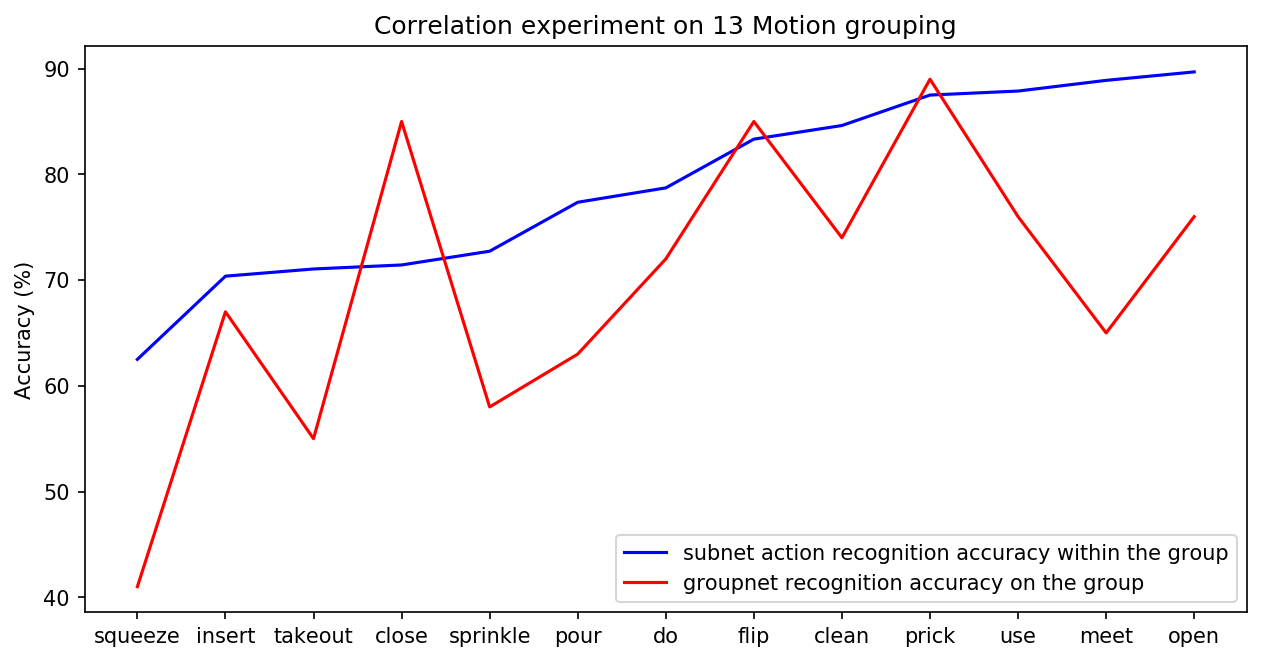

In [4]:
x = ['use', 'clean', 'close', 'do', 'flip', 'meet', 'open', 'pour', 'prick', 'sprinkle', 'insert', 'takeout', 'squeeze'] #group names
#x = np.arange(13)
y = [87.88,84.62,71.43,78.72,83.33,88.89,89.69,77.36,87.50,72.73,70.37,71.05,62.50] #subnet reco
y2 = [76,74,85,72,85,65,76,63,89,58,67,55,41] #group's own performance in confusion matrix 
#y3 = [4,3,100, 25, 0 ,100, 100,69,20,11,8,28,100] #epoch reach 100% training
#8, 28, 74,2

x = np.asarray(x)
y = np.asarray(y)
y2 = np.asarray(y2)




idx= np.argsort(y)
x=x[idx]
y=y[idx]
y2=y2[idx]


#y_values3 = [] #epoch reach 100% training
plt.figure(figsize=(10,5), dpi=150)
plt.plot(x, y, color="blue", label="subnet action recognition accuracy within the group")
#plt.plot(x,np.full((len(y)), 83.3),color="blue") # subnet reco average
plt.plot(x, y2, color="red", label="groupnet recognition accuracy on the group")
#plt.plot(x,np.full((len(y)), 70.12),color="red") # group reco average
#plt.plot(x, y3, color="green", label="epoch reach 100% training")

plt.ylabel('Accuracy (%)')
plt.title('Correlation experiment on 13 Motion grouping')

plt.legend()
plt.savefig('barplot.png', bbox_inches='tight', dpi='figure')

plt.show()